<img src='https://repository-images.githubusercontent.com/121802384/c355bb80-7d42-11e9-9e0e-4729609f9fbc' alt='WRF-Hydro Logo' width="15%"/>

# Lesson 3 - Working with WRF-Hydro inputs and output files

## Overview
We will **briefly** discuss working with some of the WRF-Hydro input and output (IO) files. The IO files for WRF-Hydro generally are standard netCDF4 files, and there are many way to work with these data. In this lesson we simply cover a few Python libraries and commands that will be needed for later lessons in this tutorial. This is by no means a comprehensive guide to working with netCDF files. 

More information on working with netCDF files can be found on the Unidata website at https://www.unidata.ucar.edu/software/netcdf/. 

## Introduction to our Python environment and libraries
We are using Python 3 for all exercises in this tutorial. There are also a number of tools developed in R that have similar capabilities, but we have chosen Python here for its ease of use and strong netCDF4 and geospatial processing support.

### Libraries
We are using the Miniconda distribution of Python 3 with the Python libraries listed below and their dependencies. Miniconda is a stripped down version of Anaconda, a Python distribution for scientific computing. You can obtain Miniconda from the Continuum Analytics website at https://conda.io/miniconda.html.

There are many resources for learning more about miniconda, conda, and Python. Answers to just about any question can be found with a little searching on either Google or Stack Overflow.

Below are the libraries we will be using. These libraries have been installed for you if you are running this tutorial in the [wrfhydro/training](https://hub.docker.com/r/wrfhydro/training/) Docker container. Otherwise, you will need to install miniconda and the required python libraries if running on your own system.

**NOTE: The libraries listed below are only the required Python libraries. These Python libraries also require a number of system libraries that you may or may not need to install on your own system. Notably, you WILL need the NETCDF4 system library**

**Required Python libraries:** 

**xarray:** xarray is an open-source project for working with self-describing Common Data Model scientific datasets, primarily in netCDF4 format. It eases many of the pain-points in loading, manipulating, and plotting multidimensional arrays. xarray is well documented and you can learn more by reading their documentation at https://xarray.pydata.org/en/stable/ or https://github.com/pydata/xarray.

**netCDF4:** Library for reading and writing netCDF files. This is a required dependency for xarray if you will be using xarray with netCDF4 datasets.

## xarray datasets
Below is a brief list of the Python commands we will be running, virtually all of the commands are from the xarray package, indicated by a `xr.` prefix preceding the command.

`xr.open_dataset('path-to-netcdf-file')`: Open a single netCDF file in xarray. 

**Note: This command only opens the netCDF file and reads header information, it does not load any of the data payload into memory** This is a handy feature of netCDF4 and xarray that allows for viewing basic information about very large netCDF files without loading into memory.

`xr.open_mfdataset(list-of-netcdf-files or 'path-to-netcdf-directory', combine=’by_coords’)`: Similar to `xr.open_dataset`, `xr.open_mfdataset` opens multiple netCDF files as a single dataset, concatenating them along a common dimension(s). 

After we have opened the datasets there are a few more methods we will use on these datasets. 

`my_dataset = xr.open_dataset('path-to-netcdf-file')`

`my_dataset.info()`: Print information about the netCDF file, similar to `ncdump` command line utility.

`my_dataset.load()`: Load the netCDF4 data payload into memory

`my_dataset.myvariable`: Access a variable named `myvariable` from the dataset.

`my_dataset.myvariable.plot()`: Plot the variable my variable. Xarray will attempt to guess the axes, and in the case of spatial or timeseries data with only 1 dimension it typically does a good job. However, you may need to specify this manually if not.

There is **MUCH** more you can do with `xarray`, but that covers the basic commands we will use in this training.

In the next section we will go over a couple of basic examples of plotting some of the outputs from our `~/wrf-hydro-training/output/lesson2/run_gridded_default` simulation.

## Examples
### 2D spatial with no temporal component

#### GEOGRID
We will start with plotting a couple of variables from our geogrid file.

In [1]:
%%bash
ls ~/wrf-hydro-training/output/lesson2/run_gridded_default/DOMAIN

Fulldom_hires.nc
GEOGRID_LDASOUT_Spatial_Metadata.nc
GWBASINS.nc
GWBUCKPARM.nc
LAKEPARM.nc
geo_em.d0

1.nc
hydro2dtbl.nc
lake_shapes
soil_properties.nc
wrfinput_d01.nc


#### Load the libraries

In [2]:
# Import xarray and turn on fancy HTML representations of datasets
import xarray as xr
xr.set_options(display_style="html")

**Open the geogrid dataset**

In [3]:
# Load a dataset
geogrid = xr.open_dataset('~/wrf-hydro-training/output/lesson2/run_gridded_default/DOMAIN/geo_em.d01.nc')

/home/docker/miniconda3/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'LU_INDEX' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  var = coder.decode(var, name=name)


**Print some info about the dataset**

In [4]:
geogrid

<xarray.Dataset> Size: 130kB
Dimensions:     (Time: 1, south_north: 16, west_east: 15, month: 12,
                 land_cat: 24, west_east_stag: 16, south_north_stag: 17,
                 soil_cat: 16)
Dimensions without coordinates: Time, south_north, west_east, month, land_cat,
                                west_east_stag, south_north_stag, soil_cat
Data variables: (12/50)
    SCB_DOM     (Time, south_north, west_east) float32 960B ...
    SCT_DOM     (Time, south_north, west_east) float32 960B ...
    ALBEDO12M   (Time, month, south_north, west_east) float32 12kB ...
    CLAT        (Time, south_north, west_east) float32 960B ...
    CLONG       (Time, south_north, west_east) float32 960B ...
    CON         (Time, south_north, west_east) float32 960B ...
    ...          ...
    XLAT_U      (Time, south_north, west_east_stag) float32 1kB ...
    XLAT_V      (Time, south_north_stag, west_east) float32 1kB ...
    XLONG_C     (Time, south_north_stag, west_east_stag) float32 1kB ...
    XLONG_M     (Time, south_north, west_east) float32 960B ...
    XLONG_U     (Time, south_north, west_east_stag) float32 1kB ...
    XLONG_V     (Time, south_north_stag, west_east) float32 1kB ...
Attributes: (12/47)
    TITLE:                           OUTPUT FROM GEOGRID V3.6
    SIMULATION_START_DATE:           0000-00-00_00:00:00
    WEST-EAST_GRID_DIMENSION:        16
    SOUTH-NORTH_GRID_DIMENSION:      17
    BOTTOM-TOP_GRID_DIMENSION:       0
    WEST-EAST_PATCH_START_UNSTAG:    1
    ...                              ...
    FLAG_LAI12M:                     1
    FLAG_LAKE_DEPTH:                 1
    history:                         Mon Feb  5 13:23:26 2018: ncatted -O -a ...
    NCO:                             "4.6.2"
    nco_openmp_thread_number:        1
    history_of_appended_files:       Fri Dec 29 11:17:44 2017: Appended file ...

**Plot the HGT_M variable, the topographic height in meters for each grid cell**

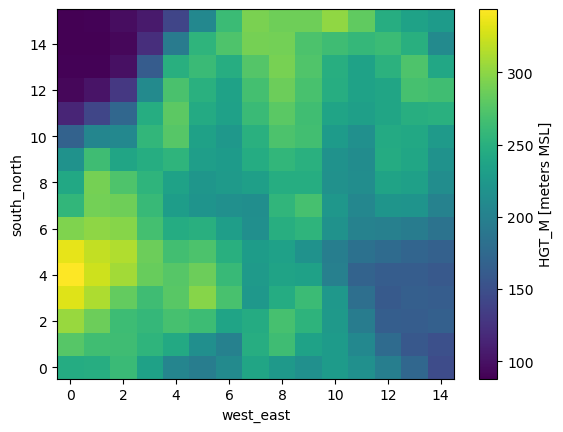

In [5]:
geogrid.HGT_M.plot()

**Plot the LU_INDEX variable, the dominant land-use class index for each grid cell**

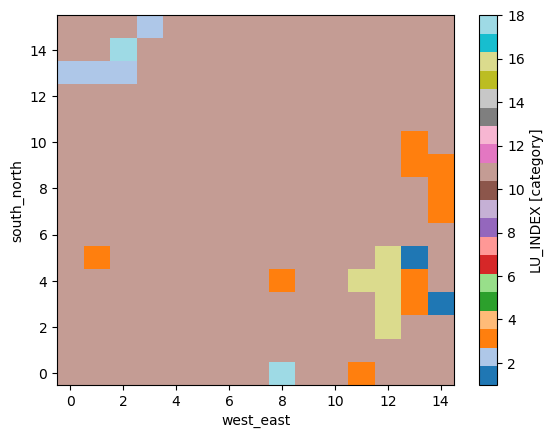

In [6]:
geogrid.LU_INDEX.plot(cmap="tab20")

**Plot the SCT_DOM variable, the dominant soil type for each grid cell**

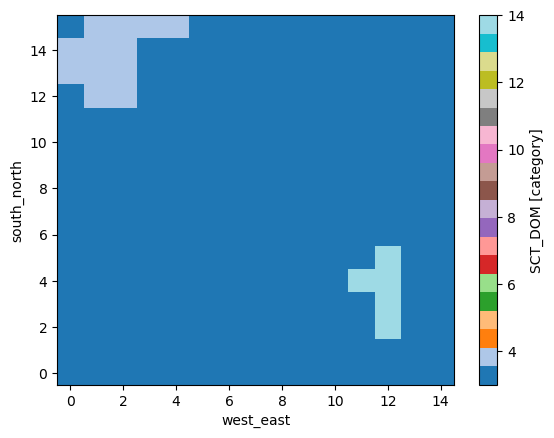

In [7]:
geogrid.SCT_DOM.plot(cmap="tab20")

So how do you know what these values mean? You can check the parameter tables that come with the code to check lookup values. For example, the MPTABLE.TBL file lists the land cover categories.

In [8]:
cat ~/wrf-hydro-training/output/lesson2/run_gridded_default/MPTABLE.TBL

&noahmp_usgs_veg_categories
 VEG_DATASET_DESCRIPTION = "USGS"
 NVEG = 27
/
&noahmp_usgs_parameters
 ! NVEG = 27
 !  1: Urban and Built-Up Land
 !  2: Dryland Cropland and Pasture
 !  3: Irrigated Cropland and Pasture
 !  4: Mixed Dryland/Irrigated Cropland and Pasture
 !  5: Cropland/Grassland Mosaic
 !  6: Cropland/Woodland Mosaic
 !  7: Grassland
 !  8: Shrubland
 !  9: Mixed Shrubland/Grassland
 ! 10: Savanna
 ! 11: Deciduous Broadleaf Forest
 ! 12: Deciduous Needleleaf Forest
 ! 13: Evergreen Broadleaf Forest
 ! 14: Evergreen Needleleaf Forest
 ! 15: Mixed Forest
 ! 16: Water Bodies
 ! 17: Herbaceous Wetland
 ! 18: Wooded Wetland
 ! 19: Barren or Sparsely Vegetated
 ! 20: Herbaceous Tundra
 ! 21: Wooded Tundra
 ! 22: Mixed Tundra
 ! 23: Bare Ground Tundra
 ! 24: Snow or Ice
 ! 25: Playa
 ! 26: Lava
 ! 27: White Sand

 ISURBAN                   =  1
 ISWATER                   = 16
 ISBARREN                  = 19
 ISICE                     = 24
 ISCROP                    =  2
 EBLFOR

The SOILPARM.TBL file lists the soil types.

In [9]:
cat ~/wrf-hydro-training/output/lesson2/run_gridded_default/SOILPARM.TBL

Soil Parameters
STAS
19,1   'BB      DRYSMC      F11     MAXSMC   REFSMC   SATPSI  SATDK      SATDW     WLTSMC  QTZ    AXAJ   BXAJ   XXAJ  '
1,     2.79,    0.010,    -0.472,   0.339,   0.192,   0.069,  4.66E-5,  2.65E-5,   0.010,  0.92,  0.009,  0.05,  0.05, 'SAND'
2,     4.26,    0.028,    -1.044,   0.421,   0.283,   0.036,  1.41E-5,  5.14E-6,   0.028,  0.82,  0.010,  0.08,  0.08, 'LOAMY SAND'
3,     4.74,    0.047,    -0.569,   0.434,   0.312,   0.141,  5.23E-6,  8.05E-6,   0.047,  0.60,  0.009,  0.09,  0.09, 'SANDY LOAM'
4,     5.33,    0.084,     0.162,   0.476,   0.360,   0.759,  2.81E-6,  2.39E-5,   0.084,  0.25,  0.010,  0.25,  0.25, 'SILT LOAM'
5,     3.86,    0.061,     0.162,   0.484,   0.347,   0.955,  2.18E-6,  1.66E-5,   0.061,  0.10,  0.012,  0.15,  0.15, 'SILT'
6,     5.25,    0.066,    -0.327,   0.439,   0.329,   0.355,  3.38E-6,  1.43E-5,   0.066,  0.40,  0.013,  0.18,  0.18, 'LOAM'
7,     6.77,    0.069,    -1.491,   0.404,   0.315,   0.135,  4.45E-6,  1.01E-5,   0.0

#### FULLDOM
Next we will look at the high-resolution routing domain file, `Fulldom_hires.nc`.

**Open the Fulldom dataset**

In [10]:
# Load a dataset
fulldom = xr.open_dataset('~/wrf-hydro-training/output/lesson2/run_gridded_default/DOMAIN/Fulldom_hires.nc')

**Print some info about the dataset**

In [11]:
fulldom

<xarray.Dataset> Size: 197kB
Dimensions:        (y: 64, x: 60)
Coordinates:
  * y              (y) float64 512B 4.369e+05 4.366e+05 ... 4.214e+05 4.211e+05
  * x              (x) float64 480B 1.842e+06 1.842e+06 ... 1.857e+06 1.857e+06
Data variables: (12/15)
    crs            |S1 1B ...
    CHANNELGRID    (y, x) int32 15kB ...
    FLOWDIRECTION  (y, x) int16 8kB ...
    FLOWACC        (y, x) int32 15kB ...
    TOPOGRAPHY     (y, x) float32 15kB ...
    RETDEPRTFAC    (y, x) float32 15kB ...
    ...             ...
    basn_msk       (y, x) int32 15kB ...
    LAKEGRID       (y, x) int32 15kB ...
    landuse        (y, x) float32 15kB ...
    LKSATFAC       (y, x) float32 15kB ...
    LATITUDE       (y, x) float32 15kB ...
    LONGITUDE      (y, x) float32 15kB ...
Attributes:
    Conventions:       CF-1.5
    GDAL_DataType:     Generic
    Source_Software:   WRF-Hydro GIS Pre-processor v5 (01/2018)
    proj4:             +proj=lcc +units=m +a=6370000.0 +b=6370000.0 +lat_1=30...
    history:           Created Wed Mar 21 11:12:35 2018
    processing_notes:  Created: Wed Mar 21 10:56:21 2018
    geogrid_used:      C:\Data\Projects\Gochis\Test_Cases\Croton_TestCase\geo...

**Plot the TOPOGRAPHY variable, the high-resolution elevation layer**

This is the layer that controls much of the terrain routing. You'll notice the higher resolution of this layer compared to the HGT_M field in the geogrid.

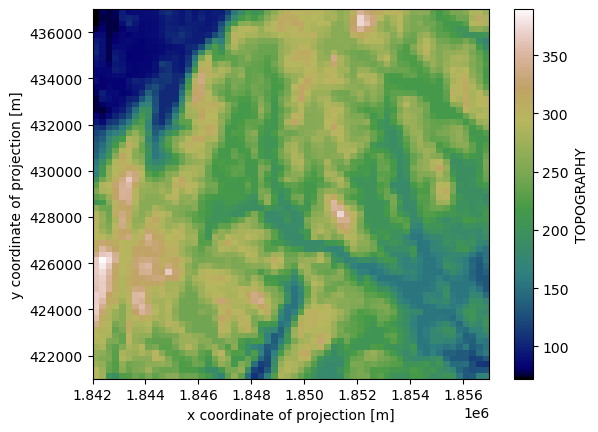

In [12]:
fulldom.TOPOGRAPHY.plot(cmap="gist_earth")

**Plot the CHANNELGRID variable, the location of channel cells on the high-resolution routing grid**

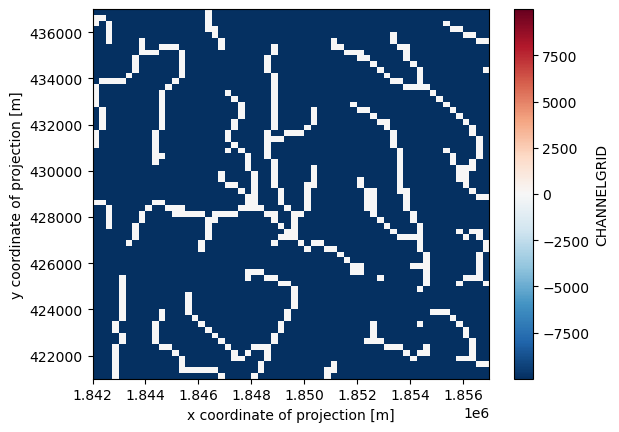

In [13]:
fulldom.CHANNELGRID.plot()

You should notice an odd gap in the gridded channel network. This is where the lake sits in this particular configuration (gridded routing with a lake).

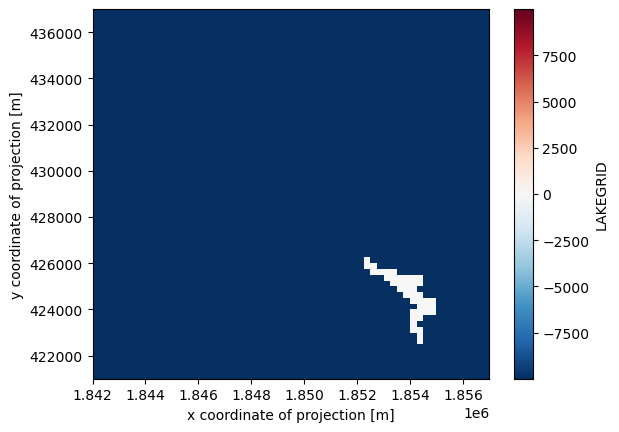

In [14]:
fulldom.LAKEGRID.plot()

#### SOIL_PROPERTIES
Let's also take a look in the NoahMP 2D/3D parameter file, `soil_properties.nc`. This is actually a bit of a misnomer, as this file contains parameters related to vegetation, surface, and soil properties. Vegetation and surface properties are in 2D, while soil properties can also (theoretically) vary with depth and are therefore in 3D. All are on the LSM grid.

**Open the soil_properties dataset**

In [15]:
# Load a dataset
soilprop = xr.open_dataset('~/wrf-hydro-training/output/lesson2/run_gridded_default/DOMAIN/soil_properties.nc')

**Print some info about the file**

In [16]:
soilprop

<xarray.Dataset> Size: 52kB
Dimensions:     (Time: 1, south_north: 16, west_east: 15, soil_layers_stag: 4)
Dimensions without coordinates: Time, south_north, west_east, soil_layers_stag
Data variables: (12/26)
    scamax      (Time, south_north, west_east) float32 960B ...
    rsurfsnow   (Time, south_north, west_east) float32 960B ...
    tau0        (Time, south_north, west_east) float32 960B ...
    snowretfac  (Time, south_north, west_east) float32 960B ...
    ssi         (Time, south_north, west_east) float32 960B ...
    rsurfexp    (Time, south_north, west_east) float64 2kB ...
    ...          ...
    smcref      (Time, soil_layers_stag, south_north, west_east) float32 4kB ...
    smcwlt      (Time, soil_layers_stag, south_north, west_east) float32 4kB ...
    vcmx25      (Time, south_north, west_east) float32 960B ...
    AXAJ        (Time, south_north, west_east) float32 960B ...
    BXAJ        (Time, south_north, west_east) float32 960B ...
    XXAJ        (Time, south_north, west_east) float32 960B ...
Attributes: (12/47)
    TITLE:                           OUTPUT FROM GEOGRID V3.6
    SIMULATION_START_DATE:           0000-00-00_00:00:00
    WEST-EAST_GRID_DIMENSION:        16
    SOUTH-NORTH_GRID_DIMENSION:      17
    BOTTOM-TOP_GRID_DIMENSION:       0
    WEST-EAST_PATCH_START_UNSTAG:    1
    ...                              ...
    FLAG_LAI12M:                     1
    FLAG_LAKE_DEPTH:                 1
    history:                         Wed May 30 21:26:55 2018: ncap2 -O -s rs...
    NCO:                             "4.5.4"
    nco_openmp_thread_number:        1
    history_of_appended_files:       Fri Dec 29 11:17:44 2017: Appended file ...

**Plot the soil porosity (smcmax)**

Default parameters by soil texture class are mapped from the `SOILPARM.TBL` lookup table to the soil type layer in the geogrid (`SCT_DOM`) to create an initial distribution of porosity values.

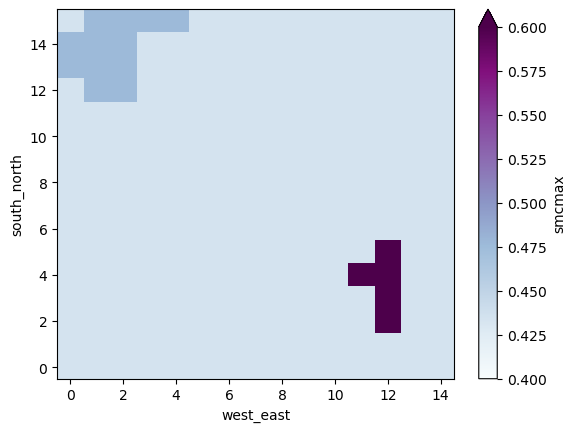

In [17]:
soilprop.smcmax.sel(soil_layers_stag = 0).plot(vmin=0.4, vmax=0.6, cmap="BuPu")

**Plot the vegetation height (hvt)**

Similarly, for default configurations, vegetation height values are pulled from `MPTABLE.TBL` and mapped via the `LU_INDEX` field in the geogrid.

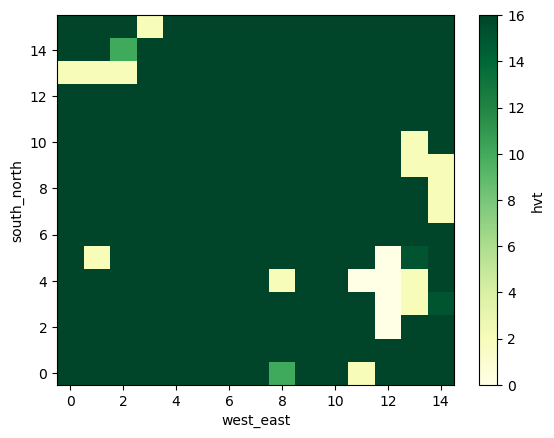

In [18]:
soilprop.hvt.plot(cmap="YlGn")

### 2D spatial with no temporal component
Now we will plot a timeseries from multiple netcdf files using the `open_mfdataset` command. We will plot a hydrograph at a gage point.



**Open the chanobs multi-file dataset**
We are going to use the `*CHANOBS*` files because it will limit outputs only to those from grid cells that we have specified as an observation point. We will discuss more about this and other output files in Lesson 4.

**NOTE: `open_mfdataset` supports wildcards for pattern matching but requires that the path be absolute with no tilde**

We will use wildcards `*` to open all files that contain 'CHANOBS' in the name.

**NOTE: Because we are opening multiple files, we need to tell xarray how to concatenate them. Because this is a timeseries with time dimension called 'time' we will specify 'time' as the concatenation dimension.

In [19]:
chanobs = xr.open_mfdataset('/home/docker/wrf-hydro-training/output/lesson2/run_gridded_default/*CHANOBS*',
                            combine='by_coords')

**Print some info about the file**

In [20]:
chanobs

<xarray.Dataset> Size: 8kB
Dimensions:         (time: 168, feature_id: 3, reference_time: 1)
Coordinates:
  * time            (time) datetime64[ns] 1kB 2011-08-26T01:00:00 ... 2011-09-02
  * reference_time  (reference_time) datetime64[ns] 8B 2011-08-26
  * feature_id      (feature_id) int64 24B 3 2 1
    latitude        (feature_id) float32 12B dask.array<chunksize=(3,), meta=np.ndarray>
    longitude       (feature_id) float32 12B dask.array<chunksize=(3,), meta=np.ndarray>
Data variables:
    crs             (time) |S1 168B b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    order           (time, feature_id) int32 2kB dask.array<chunksize=(1, 3), meta=np.ndarray>
    elevation       (time, feature_id) float32 2kB dask.array<chunksize=(1, 3), meta=np.ndarray>
    streamflow      (time, feature_id) float32 2kB dask.array<chunksize=(1, 3), meta=np.ndarray>
Attributes: (12/19)
    TITLE:                      OUTPUT FROM WRF-Hydro v5.4.0
    compiler_version:           GCC version 13.3.0
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2011-08-26_00:00:00
    station_dimension:          feature_id
    ...                         ...
    model_configuration:        retrospective
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

Here we can see that we have a time dimension of length 168 corresponding to the 168 hourly output files from our simulation `run_gridded_default`.

**Plot a hydrograph for 1 gage point**

Now we will select 1 gage from the dataset and plot our streamflow variable. For more information on indexing and selecting data with xarray see the [xarray documentation](http://xarray.pydata.org/en/stable/)

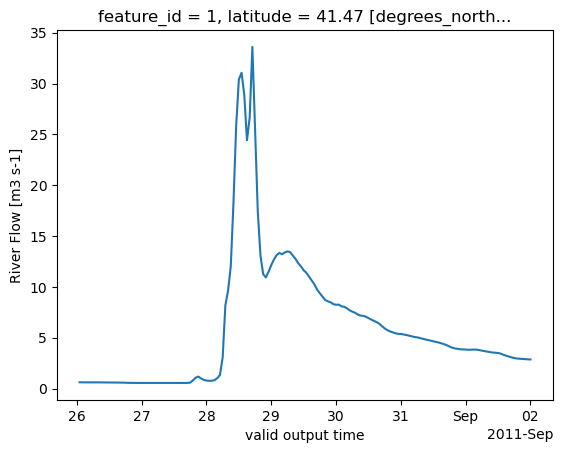

In [21]:
chanobs.sel(feature_id = 1).streamflow.plot()
#chanobs.sel(feature_id = 2).streamflow.plot()
#chanobs.sel(feature_id = 3).streamflow.plot()

# Next up - Run-time options
This concludes lesson 3. In the [next lesson](Lesson-4-run-options.ipynb) we will discuss run-time options and experiment with different options and viewing the effect on the model behavoir using xarray.

**IT IS BEST TO EITHER SHUTDOWN THIS LESSON OR CLOSE IT BEFORE PROCEEDING TO THE NEXT LESSON TO AVOID POSSIBLY EXCEEDING ALLOCATED MEMORY. Shutdown the lesson be either closing the browser tab for the lesson or selecting `Kernel -> Shut Down Kernel` in JupyterLab.**

© UCAR 2025